In order to successfully complete this assignment you need to:
1. Participate both individually and in groups during class.
2. Submit this notebook to the `exercise` folder in your `cmse802-yourlastname` repository by 10pm __the SAME DAY of the class__. Late assignment will receive <=80% of the grade.

---
# __In-Class Assignment:  Optimization I__

<img alt="Picture of an optimization surface with a local and global minimum" src="https://www.mathworks.com/content/dam/mathworks/videos/s/surrogate-optimization-public.mp4/_jcr_content/renditions/thumb-surrogate-optimization.png">

### <p style="text-align: right;"> &#9989; Rupita Tahsin

### The Power of Example Code

One of the goals of this course is to teach you how to leverage the power of examples found on the Internet.  Often students, new to programming, see an code example they do not understand and immediately shut it own. Experienced programmers have learned that example code, even when not understood is a great way to learn something new.  The trick is to get comfortable playing with the code.  Here are some basic steps to try:

* Copy and paste the code into a Jupyter notebook to see if you can get it working.  Some common things to keep an eye out for include:
    - Older **Python 2** examples (Keep an eye out for print statements without parentheses). These mostly easy to fix (add parentheses)
    - **Code that uses plotting libraries** such as `matplotlib`.  Make sure you use the `@matplotlib inline` option when you use Jupyter. [Here](](https://ipython.readthedocs.io/en/stable/interactive/plotting.html) is why.  
    - **Use of extermal libraries**. Although the Anaconda python distribution has a lot of libraries already included many example require some sort of ```pip``` or ```conda``` installation.  We will cover tricks for doing this in detail in class. Two easy ones are using local directory installs (ex packages) or better yet, using python virtual environments (conda environments). 
* Read and Google any debugging messages.  Always remember the three steps to debugging:
    1. Find **WHERE** the bug is occurring.
    2. Identify **WHAT** is causing the bug.
    3. Figure out **HOW** to it.  
* Once you get something running, then it is time to modify and change it to suite your needs. 

# Learning objectives

By the end of class you should be able to:
- Use the optimization library in `Scipy` to find minima.
- Use the library to find parameters of a curve based on noisy data.
- Explain factors that may impact the performance of optimization procedures.

---
# Outline

1. [(20 minutes) Pre-class Assignment Review](#Pre-Class_Assignment_Review)
1. [(20 minutes) Optimization library](#opt_lib)
1. [(25 minutes) Optimization Example](#Optimization_Example)
1. [(15 minutes) Find your own example](#Find_your_own_example)

----
<a name="Pre-Class_Assignment_Review"></a>

# 1. Pre-Class Assignment Review

In your group, discussion the following.

&#9989; <font color=red>**QUESTION:**</font> Did you get stuck doing pre-class exercise or find some ideas confusing? If so where did you get stuck? What did you find confusing? What solutions did your groupmates suggest?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

----
<a name="opt_lib"></a>
# 2. Optimization Libraries

There is no one "correct" optimization method for all problems.  You need to pick the method that best fits the problem at hand. The```SciPy``` module has an optimization library built in. 

&#9989; <font color=blue>**DO THIS:**</font>  Install Scipy!

In [1]:
!pip install scipy

&#9989; <font color=blue>**DO THIS:**</font>  Explore what it can do using the following code:

In [3]:
import scipy.optimize as opt

In [4]:
dir(opt)

['BFGS',
 'Bounds',
 'HessianUpdateStrategy',
 'LbfgsInvHessProduct',
 'LinearConstraint',
 'NonlinearConstraint',
 'OptimizeResult',
 'OptimizeWarning',
 'RootResults',
 'SR1',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__nnls',
 '__package__',
 '__path__',
 '__spec__',
 '_basinhopping',
 '_bglu_dense',
 '_cobyla',
 '_cobyla_py',
 '_constraints',
 '_differentiable_functions',
 '_differentialevolution',
 '_direct',
 '_direct_py',
 '_dual_annealing',
 '_group_columns',
 '_hessian_update_strategy',
 '_highs',
 '_lbfgsb',
 '_lbfgsb_py',
 '_linesearch',
 '_linprog',
 '_linprog_doc',
 '_linprog_highs',
 '_linprog_ip',
 '_linprog_rs',
 '_linprog_simplex',
 '_linprog_util',
 '_lsap',
 '_lsq',
 '_milp',
 '_minimize',
 '_minpack',
 '_minpack2',
 '_minpack_py',
 '_moduleTNC',
 '_nnls',
 '_nonlin',
 '_numdiff',
 '_optimize',
 '_qap',
 '_remove_redundancy',
 '_root',
 '_root_scalar',
 '_shgo',
 '_shgo_lib',
 '_slsqp',
 '_slsqp_py',
 '_spectra

In [5]:
help(opt)

Help on package scipy.optimize in scipy:

NAME
    scipy.optimize

DESCRIPTION
    Optimization and root finding (:mod:`scipy.optimize`)
    
    .. currentmodule:: scipy.optimize
    
    SciPy ``optimize`` provides functions for minimizing (or maximizing)
    objective functions, possibly subject to constraints. It includes
    solvers for nonlinear problems (with support for both local and global
    optimization algorithms), linear programing, constrained
    and nonlinear least-squares, root finding, and curve fitting.
    
    Common functions and objects, shared across different solvers, are:
    
    .. autosummary::
       :toctree: generated/
    
       show_options - Show specific options optimization solvers.
       OptimizeResult - The optimization result returned by some optimizers.
       OptimizeWarning - The optimization encountered problems.
    
    
    Optimization
    
    Scalar functions optimization
    -----------------------------
    
    .. autosummary::
 

In [6]:
opt.show_options()




minimize


bfgs
====

Minimization of scalar function of one or more variables using the
BFGS algorithm.

Options
-------
disp : bool
    Set to True to print convergence messages.
maxiter : int
    Maximum number of iterations to perform.
gtol : float
    Gradient norm must be less than `gtol` before successful
    termination.
norm : float
    Order of norm (Inf is max, -Inf is min).
eps : float or ndarray
    If `jac is None` the absolute step size used for numerical
    approximation of the jacobian via forward differences.
return_all : bool, optional
    Set to True to return a list of the best solution at each of the
    iterations.
finite_diff_rel_step : None or array_like, optional
    If `jac in ['2-point', '3-point', 'cs']` the relative step size to
    use for numerical approximation of the jacobian. The absolute step
    size is computed as ``h = rel_step * sign(x) * max(1, abs(x))``,
    possibly adjusted to fit into the bounds. For ``method='3-point'``
    the sign of 

&#9989; <font color=blue>**DO THIS:**</font>  Figure out how to use the optimization library to minimize the function $3x^2 - 10x + 4$ over the range [-10,10] with the `minimize_scalar` function in `scipy.optimize`.

In [9]:
# put your codes here
def f(x):
    return (3*x**2-10*x+4)
from scipy.optimize import minimize_scalar
res = minimize_scalar(f)
res.fun

-4.333333333333332

In [10]:
res.x

1.6666666913433332

In [11]:
res = minimize_scalar(f, bounds=(-10, 10), method='bounded')
res.fun  # minimum

-4.333333333333336

In [12]:
res.x  # minimizer

1.6666666666666663

----
<a name="Optimization_Example"></a>

# 3. Optimization Example

## 3.1 Curve fitting: setting up the function

Curve fitting is a type of optimization problems with the goal of finding optimal parameters for a function that best fits a given set of observations.

&#9989; **<font color=blue>DO THIS:</font>** The following is [an curve fitting example](https://ipython-books.github.io/93-fitting-a-function-to-data-with-nonlinear-least-squares/) from [IPython Cookbook, Second Edition (2018)](https://ipython-books.github.io/), a great source of programming examples. 

Go through the codes and comments on lines you consider important and run the code block.

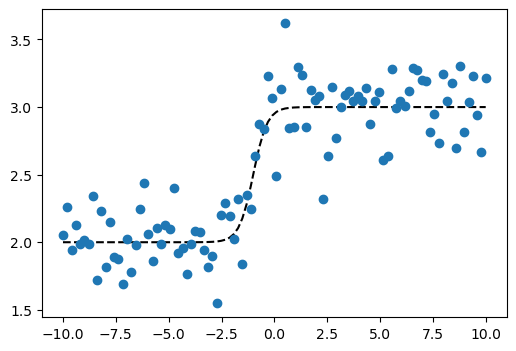

In [3]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

def f(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

a = 1
b = 2
c = 3
d = -1
n = 100

x = np.linspace(-10., 10., n)
y_model = f(x, a, b, c, d)
y = y_model + a * .2 * np.random.randn(n)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y_model, '--k')
ax.plot(x, y, 'o');

&#9989; <font color=red>**QUESTION:**</font> What is the above code doing?

<font size=+3>&#9998;</font> the main function line is the blac dotted one then we changed the functions with noisy values. 

&#9989; **<font color=blue>DO THIS:</font>** Write out the equation for $f$ with LaTex in the markdown cell below.

a / (1. + np.exp(-c * (x - d))) + b

<font size=+3>&#9998;</font> $$y = \frac{a / (1. + np.exp(-c * (x - d)))} + b$$


## 3.2 Optimization: find the optimal parameter values

At this point:
- We have a function $f$ with parameters a=1, b=2, c=3, d=-1.
- Then, based on this known function, we added noise to generate a simulated dataset $x, y$.

Now:
- __Let's pretend that we do not know what the true parameter values are for $f$__.
- Use the simulated data to fit a curve and find the optimal parameters.
- We will be using `curve_fit` in the `optimization` library of `Scipy`.

In [15]:
help(opt.curve_fit)

Help on function curve_fit in module scipy.optimize._minpack_py:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``.
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...). It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : array_like or object
        The independent variable where the data is measured.
        Should usually be an M-length sequence or an (k,M)-shaped array for
        functions with k predictors, but can actually be any object.
    ydata : array_like
        The dependent data, a length M array - nominally ``f(xdata, ...)``.
    p0 : array_like, optional
        Initial guess for the parameters (length N). If No

&#9989; **<font color=blue>DO THIS:</font>** In the code cell below, write codes that:

- Use the `curve_fit` function to fit a curve for the simulated data.
- Print out the fitted $a$, $b$, $c$, and $d$ values.
- Plot the simulated data points, the true curve, and the fitted curve in one plot.

In [4]:
# put your codes here
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

res = curve_fit(f, x, y)
res[0]

array([ 0.98980636,  2.02504789,  5.39036204, -0.98340214])

In [29]:
x = np.linspace(-10., 10., n)
y = f(x, 0.94679046,  2.04065168,  5.98845497, -1.08096885)

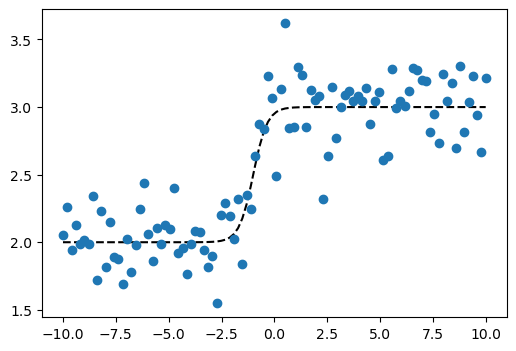

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y_model, '--k')
ax.plot(x, y, 'o');


&#9989; <font color=red>**QUESTION:**</font> What happens to the parameter values if you have fewer data points? Set n = 40 in the codes above and provide the $a$, $b$, $c$, and $d$ values.

In [8]:
n = 40
x = np.linspace(-10., 10., n)
true_y  = f(x, a, b, c, d)
noisy_y = true_y + a * .2 * np.random.randn(n)


res = curve_fit(f,x,noisy_y)
res[0]

array([ 0.93011581,  2.05202706, 10.37594882, -0.90947974])

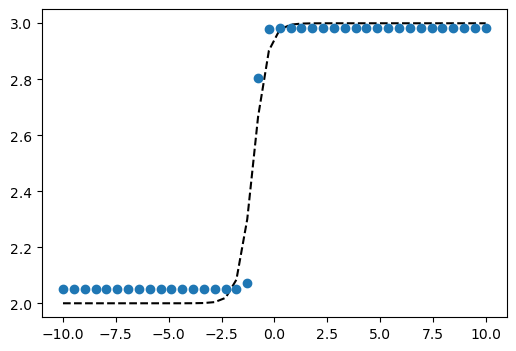

In [10]:

y = f(x, 0.93011581,  2.05202706, 10.37594882, -0.90947974)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, true_y, '--k')
ax.plot(x, y, 'o')

<font size=+3>&#9998;</font> as the number of x and y decreased, so the error are higher in the parameter.

&#9989; <font color=red>**QUESTION:**</font> What happens if the amplitudes of noise is larger? Replac $0.2$ with $1$ in the codes above and provide the $a$, $b$, $c$, and $d$ values.

In [15]:
n= 100
x = np.linspace(-10., 10., n)
y_model = f(x, a, b, c, d)
y = y_model + a * 1 * np.random.randn(n)

res = curve_fit(f,x,y)
res[0]

array([1.02751298, 2.14147134, 0.78646718, 0.73736699])

In [16]:
y = f(x, 1.02751298, 2.14147134, 0.78646718, 0.73736699)

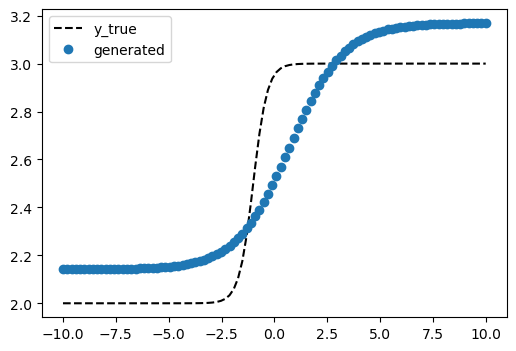

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y_model, '--k',label='y_true')
ax.plot(x, y, 'o', label='generated')
ax.legend();

<font size=+3>&#9998;</font> the curve is smooth because the sample size is higher than before however, the errors is smaller than the actual value of the parameter.

&#9989; <font color=red>**QUESTION:**</font> Is there anything in your own research that may be able to build off of this type of model? 

<font size=+3>&#9998;</font> yes some of my data analysis has this type of build off model

## 3.3 Apply the approach to a different function

&#9989; **<font color=blue>DO THIS:</font>** In the code block below:

- Define paramters $a$, $b$, $c$ where $a, b, c \in [0,3]$.
- Generate simulated data from the function $f(x) =a \cdot\mathrm{sinc}(bx) + c $.
  - Make sure you introduce some noise.
  - <font color = red> Note:</font> $\mathrm{sinc} \neq \sin$, [be careful](https://en.wikipedia.org/wiki/Sinc_function).
- Find the optimal $a$, $b$, and $c$. 
- Plot the simulated data points, true curve, and the fitted curve.

In [22]:

### your code here
𝑎, 𝑏, 𝑐 = 1, 2, 2.8

def f(x,a,b,c):
    return a*np.sinc(b*x)+c

n= 100
x = np.linspace(-10., 10., n)
y_model = f(x, a, b, c)
y = y_model + a * .2 * np.random.randn(n)

res = curve_fit(f,x,y)
res[0]



array([0.48521192, 1.12221066, 2.80042397])

In [ ]:
y_model = f(x, 0.48521192, 1.12221066, 2.80042397)

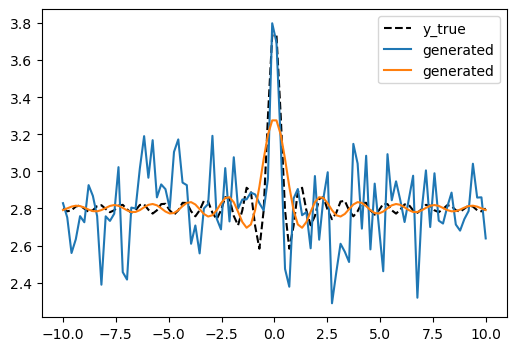

In [28]:
y_fitted = f(x, 0.48521192, 1.12221066, 2.80042397)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y_model, '--k',label='y_true')
ax.plot(x, y, label='generated')
ax.plot(x, y_fitted, label='generated')
ax.legend();

&#9989; <font color=red>**QUESTION:**</font> Discuss with your groupmates. Look at the simulated data, if you do not know the formula of the function, would you have been able to fit the model so well? 

<font size=+3>&#9998;</font> Yes we can fit the model if we don't know the formula of the function

----
<a name="Find_your_own_example"></a>

# 4. Solving the curve fitting problem with gradient descent 

Work with your groupmates to come up with a plan to solve the curve fitting problem in Section 3.3 by the gradient descent method introduced in the pre-class assigment, and then answer the following questions. No actual coding is required for this problem. 

&#9989; <font color=red>**QUESTION:**</font> What objective function do we want to minimize for finding the best curve that fits the data?

<font size=+3>&#9998;</font> Replace with your answer to the above question! Use latex to type in mathematical formula

&#9989; <font color=red>**QUESTION:**</font> What is the gradient of the objective function? (Sympy can help to compute the gradient).

<font size=+3>&#9998;</font> The main objective of gradient descent is to minimize the convex function using iteration of parameter updates. 

&#9989; <font color=red>**QUESTION:**</font> How do you plan to use the gradient descent code in the pre-class assignment to find the best fitting curve?

<font size=+3>&#9998;</font> a good initial guess and hoping to minimize the function

---------
# Congratulations, you're done with your in-class assignment!

__Please make sure you upload your file by 10pm the same day of the class!__ Late exercise will receive <=80% of the grade.

&#169; Copyright 2021,  Michigan State University Board of Trustees